In [1]:
from plot import *
from gen import *
from load_data import *
from func_tools import *
from AGM import *
from GM import *

### 生成随机数

In [2]:
# 这里使用默认的参数，按照均匀分布的中心点
# TODO: task 上说可以尝试有趣的pattern，我们可以手动给定centroid再生成周围点，详见 gen.py 的文档
centroids, points, N = gen_data() 

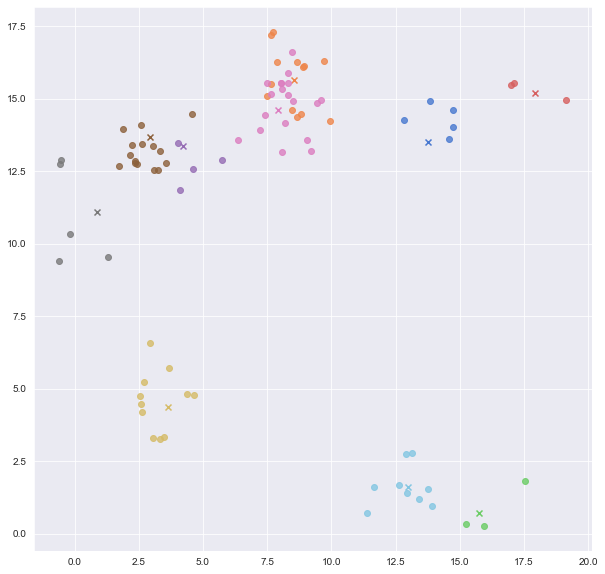

In [3]:
# 简单画个图
plt.figure(figsize=(10,10))
plot_generated_data(centroids, points, N)

### 读取数据

In [4]:
# wine, mnist, vowel, segment 可替换
# 加载稀疏矩阵
wine_data, wine_label = load_wine()
# 加载稠密矩阵
wine_data_dense, wine_label = load_wine_dense()

## AGM Sample

In [5]:
lbd = 0.05
delta = 1e-3
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd)

In [6]:
ans,AGM_loss = AGM(grad,np.zeros_like(points),step,0.001)

In [7]:
groups = get_group(ans, tol=2)

In [8]:
groups

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2])

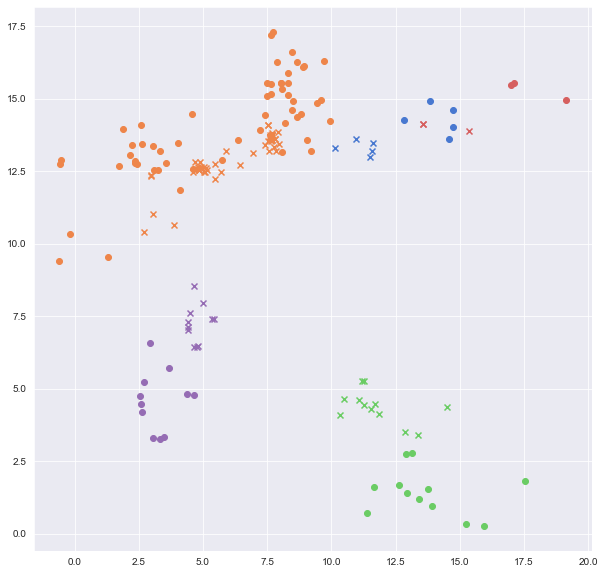

In [9]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups)

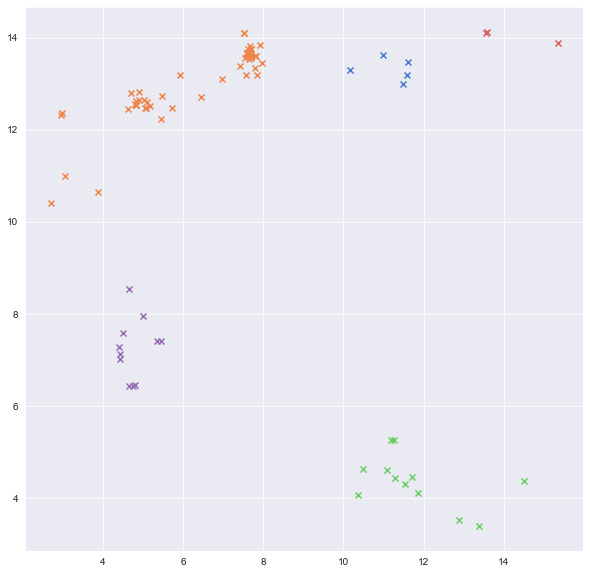

In [10]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='ans')

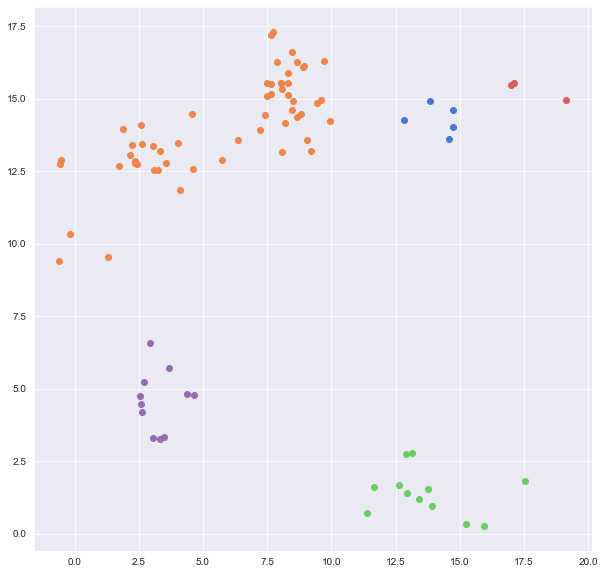

In [11]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='points')

In [12]:
lbd = 0.05
delta = 1e-3
func = lambda X: loss_func(X,points,lbd,delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd)
ans2,GM_loss = GM(points,func,grad,0.5)

In [13]:
groups = get_group(ans2, tol=2)

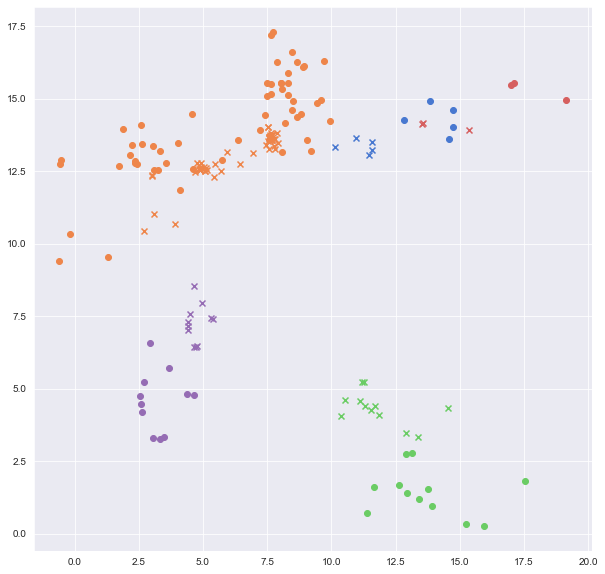

In [14]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans2,groups,way='all')

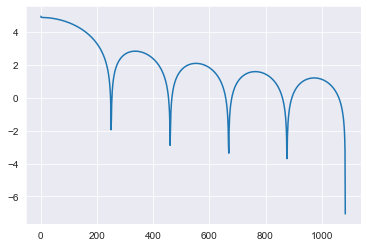

In [19]:
plt.plot(np.log(AGM_loss))

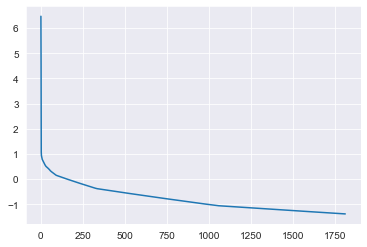

In [18]:
plt.plot(np.log(GM_loss))